In [1]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy/reference/stats.html

https://www.statsmodels.org/stable/stats.html

In [2]:
path = '/home/lean/Documentos/Lean/Estadistica/Manejo de Datos en Biología Computacional. Herramientas de Estadística/Herramientas-de-estadistica/Modulo3/'
ca_binding = pd.read_csv(path + 'final_df.csv')
ca_binding.head()

,PDB_x,Number of ligands,PDB Metal Number,Coordination Geometry,Coordination Number,Pattern,Donor Name,Donor PDB Name,Donor Distance,metal_final,ligando,cadena_final,pos_final,pKa,Buried%,Secondary structure,Relative ASA,Binding Energy_y
0,5A70,11,199,square antiprism (distorted),8,EX(3)DX(1)DX(2)D,O,OD1,2.671302,CA,ASP,D,104.0,NaN,NaN,S,0.030675,4.80654
1,5A70,11,199,square antiprism (distorted),8,EX(3)DX(1)DX(2)D,O,OD2,2.392563,CA,ASP,D,104.0,NaN,NaN,S,0.030675,4.80654
2,5A70,11,199,square antiprism (distorted),8,EX(3)DX(1)DX(2)D,O,OD1,2.362019,CA,ASP,D,99.0,NaN,NaN,S,0.619632,4.80654
3,5A70,11,199,square antiprism (distorted),8,EX(3)DX(1)DX(2)D,O,OE1,2.494074,CA,GLU,D,95.0,NaN,NaN,E,0.020619,4.80654
4,5A70,11,199,square antiprism (distorted),8,EX(3)DX(1)DX(2)D,O,OE2,2.369735,CA,GLU,D,95.0,NaN,NaN,E,0.020619,4.80654


MannwhitneyuResult(statistic=543505857.0, pvalue=2.697524837052229e-21)

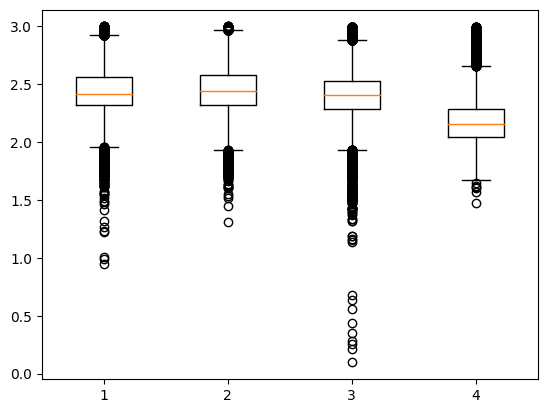

In [38]:
# filtrar datos

DD_ASP = ca_binding[ca_binding['ligando']=='ASP']['Donor Distance']
DD_GLU = ca_binding[ca_binding['ligando']=='GLU']['Donor Distance']
DD_HOH = ca_binding[ca_binding['ligando']=='HOH']['Donor Distance']
DD_HIS = ca_binding[ca_binding['ligando']=='HIS']['Donor Distance']

# distribución
plt.boxplot([DD_ASP,DD_GLU,DD_HOH,DD_HIS])
ss.normaltest(DD_HOH)
# outliers

# tamaño muestral

# test de comparación
# ss.kruskal(DD_ASP,DD_GLU,DD_HOH,DD_HIS)#, nan_policy='propagate', axis=0, keepdims=False)

ss.mannwhitneyu(DD_ASP, DD_GLU, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)

In [4]:
pockets_table = pd.DataFrame(cavidb_modelos['pockets'].values.tolist(), index=cavidb_modelos.index)

print (pockets_table)

                                                   0   \
0   {'pocket_id': 1, 'pocket_score': 0.3113, 'drug...   
1   {'pocket_id': 1, 'pocket_score': 0.1584, 'drug...   
2   {'pocket_id': 1, 'pocket_score': 0.21760000000...   
3   {'pocket_id': 1, 'pocket_score': 0.2622, 'drug...   
4   {'pocket_id': 1, 'pocket_score': 0.1061, 'drug...   
5   {'pocket_id': 1, 'pocket_score': 0.1584, 'drug...   
6   {'pocket_id': 1, 'pocket_score': 0.1928, 'drug...   
7   {'pocket_id': 1, 'pocket_score': 0.2622, 'drug...   
8   {'pocket_id': 1, 'pocket_score': 0.1932, 'drug...   
9   {'pocket_id': 1, 'pocket_score': 0.0916, 'drug...   
10  {'pocket_id': 1, 'pocket_score': 0.19140000000...   
11  {'pocket_id': 1, 'pocket_score': 0.21760000000...   
12  {'pocket_id': 1, 'pocket_score': 0.1107, 'drug...   
13  {'pocket_id': 1, 'pocket_score': 0.115, 'drug_...   
14  {'pocket_id': 1, 'pocket_score': 0.294, 'drug_...   
15  {'pocket_id': 1, 'pocket_score': 0.1226, 'drug...   
16  {'pocket_id': 1, 'pocket_sc

In [39]:
print(DD_ASP.median(),DD_GLU.median(),DD_HOH.median(),DD_HIS.median())

2.4144194 2.440411 2.40431155 2.1530201499999997


In [5]:
cavidb_modelos_sampling = cavidb_modelos.sample(n = 10)

In [6]:
pdb_4nsc = cavidb_modelos[cavidb_modelos['pdb_id']=='4nsc']
pdb_4nsd = cavidb_modelos[cavidb_modelos['pdb_id']=='4nsd']

In [7]:
ss.shapiro(cavidb_modelos['radius_of_gyration'])

ShapiroResult(statistic=0.931483268737793, pvalue=0.09404389560222626)

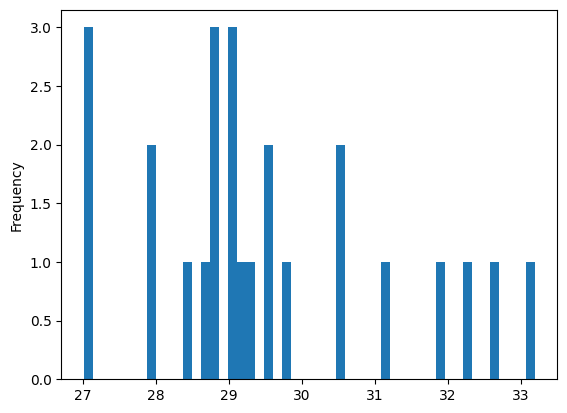

In [8]:
plt.hist(cavidb_modelos['radius_of_gyration'], bins=50)
plt.ylabel('Frequency');

In [9]:
effect_size = abs((cavidb_modelos['radius_of_gyration'].max()-cavidb_modelos['radius_of_gyration'].min())/cavidb_modelos['radius_of_gyration'].std())   # diferencia de medias esperada
alpha = 0.05      # nivel de significancia
power = 0.8       # potencia
ratio = 1         # relación entre los tamaños de las muestras
n = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print("El tamaño muestral necesario es:", round(n))

El tamaño muestral necesario es: 3


In [31]:
# Calcular la media y la desviación estándar de los datos existentes
datos_mean1 = np.mean(DD_ASP)
datos_mean2 = np.mean(DD_HIS)
datos_std = np.std(ca_binding['Donor Distance'], ddof=1)

# Definir los parámetros de la prueba
effect_size = abs(datos_mean1 - datos_mean2)/ datos_std
alpha = 0.05
power = 0.8

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Calcular el tamaño muestral necesario
n = ttp.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

# Imprimir el resultado
print("El tamaño muestral necesario es:", round(n))


El tamaño muestral necesario es: 18


In [11]:
ss.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', keepdims=False)

NameError: name 'a' is not defined

In [ ]:
ss.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
ss.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

In [ ]:
ss.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

In [ ]:
ss.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto')
ss.ks_2samp(data1, data2, alternative='two-sided', method='auto')
ss.ks_1samp(x, cdf, args=(), alternative='two-sided', method='auto')

In [ ]:
ss.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)

In [ ]:
scipy.stats.kruskal(*samples, nan_policy='propagate', axis=0, keepdims=False)

In [ ]:
ss.wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims=False)

In [ ]:
ss.levene(samples, center='median', proportiontocut=0.05)

In [ ]:
ss.binomtest(x, n=None, p=0.5, alternative='two-sided')

In [15]:
ca_binding_sinNAN_sinDuplicados = ca_binding.dropna(subset=['Binding Energy_y']).drop_duplicates(subset=['Binding Energy_y'],keep='first')
ca_binding_sinNAN_sinDuplicados

,PDB_x,Number of ligands,PDB Metal Number,Coordination Geometry,Coordination Number,Pattern,Donor Name,Donor PDB Name,Donor Distance,metal_final,ligando,cadena_final,pos_final,pKa,Buried%,Secondary structure,Relative ASA,Binding Energy_y
0,5A70,11,199,square antiprism (distorted),8,EX(3)DX(1)DX(2)D,O,OD1,2.671302,CA,ASP,D,104.0,NaN,NaN,S,0.030675,4.806540
8,5A70,11,200,square antiprism with a vacancy (distorted),7,"G, NX(79)DX(1)NX(0)D",O,O3,2.513590,CA,FUC,D,201.0,NaN,NaN,NaN,NaN,6.264730
13,5A70,11,200,square antiprism with a vacancy (distorted),7,"G, NX(79)DX(1)NX(0)D",O,O,2.464326,CA,GLY,C,114.0,NaN,NaN,-,1.000000,6.320510
15,5A70,11,199,square antiprism (distorted),8,EX(3)DX(1)DX(2)D,O,OD1,2.637739,CA,ASP,A,104.0,7.52,68.0,S,0.024540,4.643800
23,5A70,11,200,square antiprism with a vacancy (distorted),7,"NX(79)DX(1)NX(0)D, G",O,OD1,2.375484,CA,ASP,A,104.0,7.52,68.0,S,0.024540,6.137190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188522,4DSJ,1,1003,irregular (n/a),2,E,O,O2G,2.264087,CA,DGT,A,1001.0,NaN,NaN,NaN,NaN,-0.092503
188524,4DSK,5,1003,trigonal prism with a vacancy (regular),5,L,O,O,2.617763,CA,HOH,A,1240.0,NaN,NaN,NaN,NaN,-4.278850
188531,4DSK,6,101,square pyramid with a vacancy (equatorial) (di...,4,L,O,O,2.287817,CA,HOH,B,201.0,NaN,NaN,NaN,NaN,-0.986454
188533,4DSK,6,1002,trigonal plane (regular),3,DX(0)E,O,O,2.810784,CA,POP,A,1001.0,NaN,NaN,NaN,NaN,-3.323390


In [9]:
# Test de outliers

'''Este test me devuelve las posiciones que tiene un z-score por encima del valor de referencia;
es decir, las posiciones de los datos outliers'''

#Calcula el estadístico del test
z = np.abs(ss.zscore(ca_binding_sinNAN_sinDuplicados['Binding Energy_y']))

#Muestra las posiciones donde están los outliers
threshold = 3
print(np.where(z > threshold))

df_no_outliers = ca_binding_sinNAN_sinDuplicados[(z < threshold)]

(array([ 7026,  7027, 17472, 20694, 24764, 24765, 25304, 25305, 25307,
       25308, 25309, 25310]),)


(array([  1.,   0.,   0.,   0.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   3.,
          0.,   0.,   1.,   1.,   3.,   0.,   0.,   3.,   0.,   1.,   2.,
          0.,   2.,   2.,   5.,   4.,   1.,   4.,   3.,   1.,   1.,   4.,
          3.,   2.,   3.,   3.,   3.,   3.,   0.,   7.,   2.,   3.,   2.,
          2.,   2.,   3.,   2.,   5.,   1.,   5.,   5.,   1.,   3.,   4.,
         10.,   3.,   1.,   3.,   4.,   1.,   3.,   7.,   5.,   3.,   4.,
          7.,   5.,   3.,   3.,   5.,  13.,   4.,   3.,   3.,   3.,   5.,
          7.,   6.,   4.,   3.,   5.,   1.,   8.,   8.,   4.,   3.,   4.,
          5.,   6.,   9.,   5.,   9.,   2.,   7.,   4.,   5.,   9.,   7.,
          6.,   6.,   6.,   4.,   9.,   6.,  10.,   7.,  14.,  11.,   9.,
          4.,   2.,   6.,   6.,   3., 

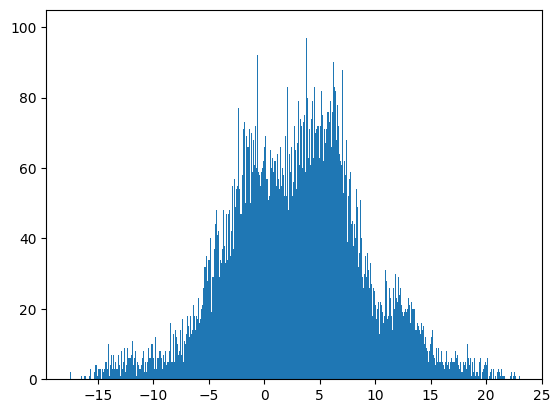

In [17]:
plt.hist(df_no_outliers['Binding Energy_y'],bins=1000)

In [14]:
ss.normaltest(df_no_outliers['Binding Energy_y'])

NormaltestResult(statistic=55.568823537967056, pvalue=8.57794556284979e-13)

In [18]:
ss.spearmanr(df_no_outliers['Coordination Number'],df_no_outliers['Binding Energy_y'])

SpearmanrResult(correlation=0.38418710827095764, pvalue=0.0)

<Axes: xlabel='Coordination Number', ylabel='Binding Energy_y'>

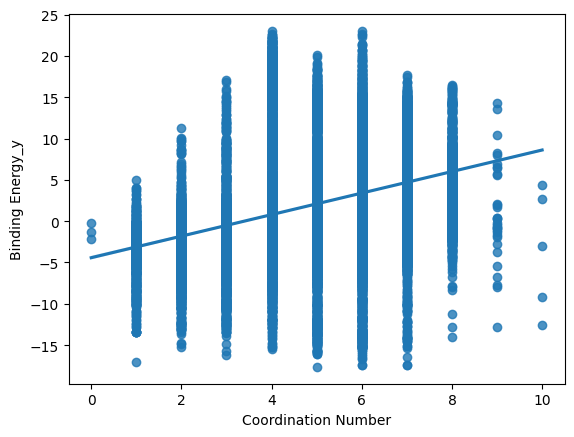

In [21]:
import seaborn as sns

sns.regplot(x=df_no_outliers['Coordination Number'],y=df_no_outliers['Binding Energy_y'])
